In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize
import scipy.integrate as integrate
import time
from IPython.display import Image
from tqdm.notebook import tqdm
from mpmath import mp
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
plt.rcParams.update({'font.size': 15})
# Enable LaTeX rendering (requires LaTeX installation)
#plt.rcParams['text.usetex'] = True  # Set to False if LaTeX is unavailable
#plt.rcParams['text.latex.preamble'] = r'\usepackage{times}'  # Use Times New Roman
#plt.rcParams.update({
#    'font.family': 'Times New Roman',  # Fallback if LaTeX is disabled
#    'font.size': 20,                   # Base font size
#    'axes.labelsize': 20,              # Axes labels
#    'axes.titlesize': 22,              # Title
#    'xtick.labelsize': 18,             # X-tick labels
#    'ytick.labelsize': 18,             # Y-tick labels
#    'legend.fontsize': 18,             # Legend
#    'figure.dpi': 150,                 # High resolution for preview
#})

In [2]:
mu0 = 4e-7*np.pi
c0 = 299792458
eps0 = 1/(c0**2*mu0)
hbar = 1.05457182e-34
kb = 1.380649e-23
##############
#$\mu$ is dipole matrix element. This is set to e*1.3nm in the paper
mu = 1.60217663e-19*1.3e-9
#Lc is the total length of the 1d photonic lattice
Lc = 1.2e-4
#Lr is the total length of the system including the vaccum part.
Lr = 0.012
#Np is the number of periods of the photonic lattices.
Np = 12
#lp is the length of one period.
lp = Lc/Np
#L is the normalized total lengt
L = np.round(Lr/lp)
#gamma is polarization decay rate
gamma = 1e12 
kb_normal = kb/(gamma**2)
hbar_normal = hbar/gamma
gamma_d = 5e11/gamma

# Passive Regime

$T_p = 0.01$

In [22]:
Ndata_files = "./Data/rk45/passive/Photon_n_Tp0.01_n500_gr1.0e+13_t00.0_tb400.0_v2.npz"
Ndata = np.load(Ndata_files, allow_pickle=True)
p_np = Ndata['parameters']
tl1 = Ndata['t']
Nkt1 = Ndata['Nkt']
Nbt1 = Ndata['Nbt']
print(np.shape(Nbt1))
print(Nkt1[-1,1400])
p_np


(2754, 500)
0.14752578875596473


array({'gamma': 1000000000000.0, 'gamma_normal': 1, 'gamma_c': 0.001, 'gamma_r': 10.0, 'Lambda_0': 0.01, 'omega_0': 160.0, 'N': 601, 'Np': 12, 'Temp_p': 400, 'Temp': 400, 'A': 1e-16, 'D': 0.00774339381694},
      dtype=object)

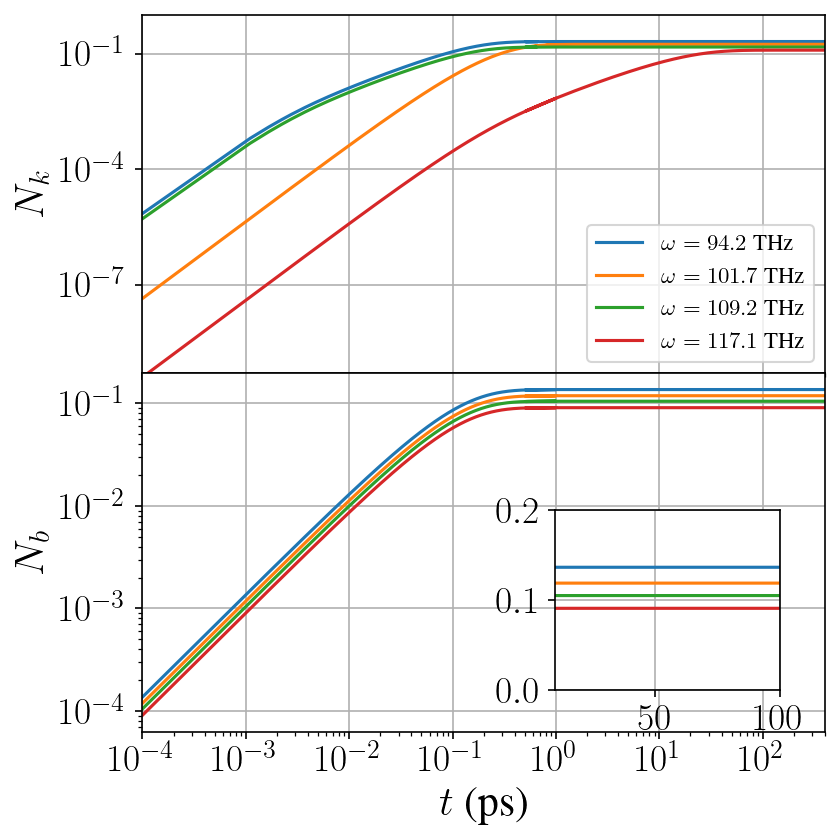

In [23]:
fig, axs = plt.subplots(2, 1, sharex=True,figsize=(6,6))
plt.subplot(211)
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e-4,400)
plt.ylim(5e-10,1)
plt.ylabel(r"$N_k$")
#plt.xlabel(r"$t$ (ps)") 
#plt.title(r"$T_{pc}=0.01\,, \gamma_r=10^{13}$ s$^{-1}$")
plt.plot(tl1, Nkt1[:,1200],label=r'$\omega=94.2$ THz')
plt.plot(tl1, Nkt1[:,1300],label=r'$\omega=101.7$ THz')
plt.plot(tl1, Nkt1[:,1400],label=r'$\omega=109.2$ THz')
plt.plot(tl1, Nkt1[:,1500],label=r'$\omega=117.1$ THz')
plt.legend(loc=4,prop={'size': 11})
plt.tight_layout()
plt.grid()

plt.subplot(212)
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e-4,400)
#plt.ylim(0,0.2)
plt.ylabel(r"$N_b$")
plt.xlabel(r"$t$ (ps)") 
#plt.title(r"$T_{pc}=0.01\,, \gamma_r=10^{13}$ s$^{-1}$")
Nt = 601
plt.plot(tl1, Nbt1[:,94]/Nt,label=r'$\omega=94.2$ THz')
plt.plot(tl1, Nbt1[:,102]/Nt,label=r'$\omega=101.7$ THz')
plt.plot(tl1, Nbt1[:,109]/Nt,label=r'$\omega=109.2$ THz')
plt.plot(tl1, Nbt1[:,117]/Nt,label=r'$\omega=117.1$ THz')
#plt.legend(loc=4,prop={'size': 12})
plt.tight_layout()
plt.grid()

plt.subplots_adjust(hspace=0)  # Zero vertical spacing between subplots

# Inset axis: position can be fine-tuned (x0, y0, width, height in relative units)
inset_ax = fig.add_axes([0.65, 0.2, 0.25, 0.2])
#inset_ax = inset_axes(ax, width="30%", height="30%", loc='upper left')
inset_ax.plot(tl1, Nbt1[:,94]/Nt,label=r'$\omega=94.2$ THz')
inset_ax.plot(tl1, Nbt1[:,102]/Nt,label=r'$\omega=101.7$ THz')
inset_ax.plot(tl1, Nbt1[:,109]/Nt,label=r'$\omega=109.2$ THz')
inset_ax.plot(tl1, Nbt1[:,117]/Nt,label=r'$\omega=117.1$ THz')
inset_ax.set_xlim([10,100])
inset_ax.set_ylim([0,0.2])
inset_ax.grid()


plt.show()

$T_p$=0.01 $A=10^{-14}$

In [24]:
Ndata_files = "./Data/rk45/passive/Photon_n_Tp0.01_n500_gr1.0e+13_gc1.0e+09_t00.0_tb4000.0_A1e-14_N100(1).npz"
Ndata = np.load(Ndata_files, allow_pickle=True)
p_np = Ndata['parameters']
tl2 = Ndata['t']
Nkt2 = Ndata['Nkt']
Nbt2 = Ndata['Nbt']
Nat2 = Ndata['Nat']
print(Nat2 + Nbt2)
print(np.shape(Nbt2))
p_np


[[100. 100. 100. ... 100. 100. 100.]
 [100. 100. 100. ... 100. 100. 100.]
 [100. 100. 100. ... 100. 100. 100.]
 ...
 [100. 100. 100. ... 100. 100. 100.]
 [100. 100. 100. ... 100. 100. 100.]
 [100. 100. 100. ... 100. 100. 100.]]
(4572, 500)


array({'gamma': 1000000000000.0, 'gamma_normal': 1, 'gamma_c': 0.001, 'gamma_r': 10.0, 'Lambda_0': 0.01, 'omega_0': 160.0, 'N': 100, 'Np': 12, 'Temp_p': 400, 'Temp': 400, 'A': 1e-14, 'D': 7.743393816939998e-05},
      dtype=object)

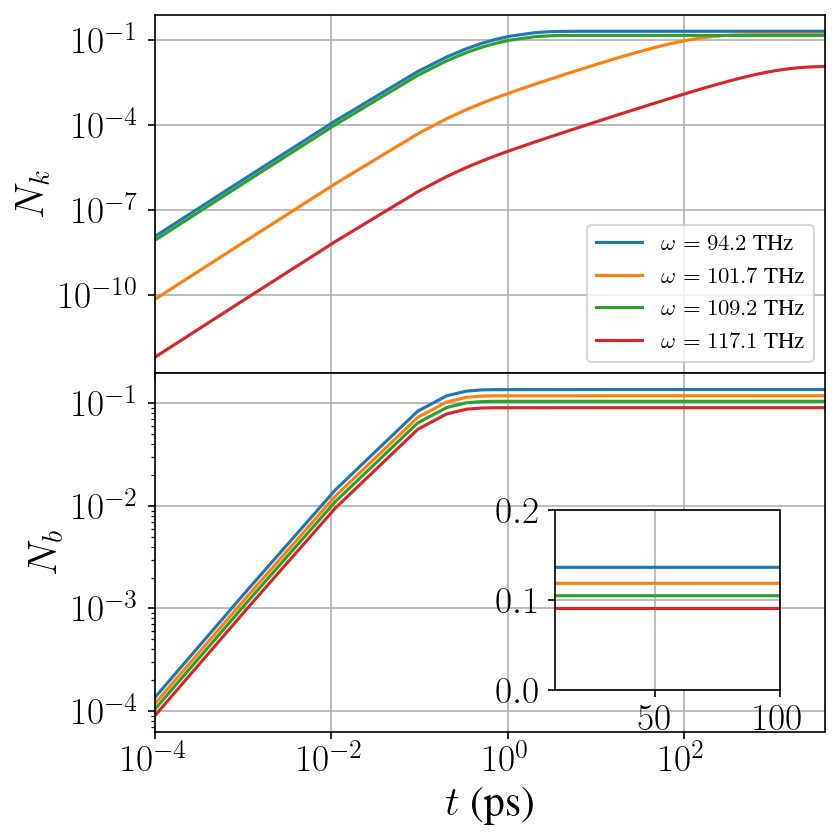

In [37]:
fig, axs = plt.subplots(2, 1, sharex=True,figsize=(6,6))
plt.subplot(211)
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e-4,4000)
#plt.ylim(1e-5,1e-1)
plt.ylabel(r"$N_k$")
plt.xlabel(r"$t$ (ps)") 
#plt.title(r"$T_{pc}=0.01\,, \gamma_r=10^{13}$ s$^{-1}$")
plt.plot(tl2, Nkt2[:,1200],label=r'$\omega=94.2$ THz')
plt.plot(tl2, Nkt2[:,1300],label=r'$\omega=101.7$ THz')
plt.plot(tl2, Nkt2[:,1400],label=r'$\omega=109.2$ THz')
plt.plot(tl2, Nkt2[:,1500],label=r'$\omega=117.1$ THz')
plt.legend(loc=4,prop={'size': 11})
plt.tight_layout()
plt.grid()

plt.subplot(212)
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e-4,4000)
#plt.ylim(0,0.2)
plt.ylabel(r"$N_b$")
plt.xlabel(r"$t$ (ps)") 
#plt.title(r"$T_{pc}=0.01\,, \gamma_r=10^{13}$ s$^{-1}$")
Nt = 100
plt.plot(tl2, Nbt2[:,94]/Nt,label=r'$\omega=94.2$ THz')
plt.plot(tl2, Nbt2[:,102]/Nt,label=r'$\omega=101.7$ THz')
plt.plot(tl2, Nbt2[:,109]/Nt,label=r'$\omega=109.2$ THz')
plt.plot(tl2, Nbt2[:,117]/Nt,label=r'$\omega=117.1$ THz')
plt.tight_layout()
plt.grid()
plt.subplots_adjust(hspace=0)  # Zero vertical spacing between subplots

# Inset axis: position can be fine-tuned (x0, y0, width, height in relative units)
inset_ax = fig.add_axes([0.65, 0.2, 0.25, 0.2])
#inset_ax = inset_axes(ax, width="30%", height="30%", loc='upper left')
inset_ax.plot(tl2, Nbt2[:,94]/Nt,label=r'$\omega=94.2$ THz')
inset_ax.plot(tl2, Nbt2[:,102]/Nt,label=r'$\omega=101.7$ THz')
inset_ax.plot(tl2, Nbt2[:,109]/Nt,label=r'$\omega=109.2$ THz')
inset_ax.plot(tl2, Nbt2[:,117]/Nt,label=r'$\omega=117.1$ THz')
inset_ax.set_xlim([10,100])
inset_ax.set_ylim([0,0.2])
inset_ax.grid()

plt.show()

In [26]:
Ndata_files = "./Data/rk45/passive/Photon_n_Tp0.01_n500_gr1.0e+13_gc1.0e+11_t00.0_tb500.0_A1e-16_N100.npz"
Ndata = np.load(Ndata_files, allow_pickle=True)
p_np = Ndata['parameters']
tl3 = Ndata['t']
Nkt3 = Ndata['Nkt']
Nbt3 = Ndata['Nbt']
Nat3 = Ndata['Nat']
print(Nat3 + Nbt3)
print(tl3[-1])


[[100. 100. 100. ... 100. 100. 100.]
 [100. 100. 100. ... 100. 100. 100.]
 [100. 100. 100. ... 100. 100. 100.]
 ...
 [100. 100. 100. ... 100. 100. 100.]
 [100. 100. 100. ... 100. 100. 100.]
 [100. 100. 100. ... 100. 100. 100.]]
500.0


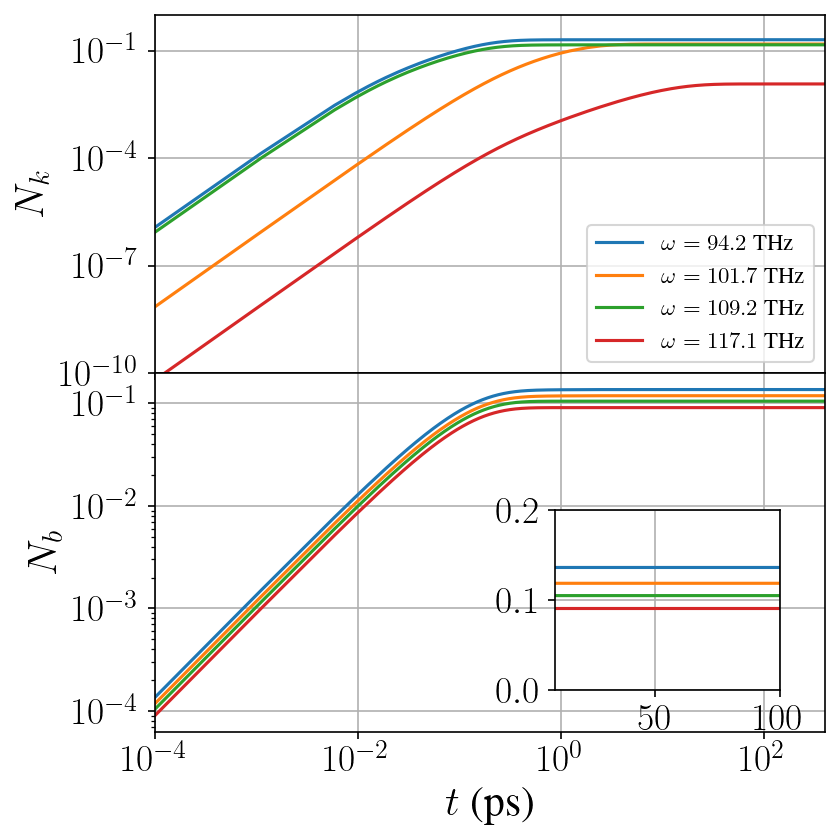

In [27]:
fig, axs = plt.subplots(2, 1, sharex=True,figsize=(6,6))
plt.subplot(211)
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e-4,400)
plt.ylim(1e-10,1)
plt.ylabel(r"$N_k$")
plt.xlabel(r"$t$ (ps)") 
#plt.title(r"$T_{pc}=0.01\,, \gamma_r=10^{13}$ s$^{-1}$")
plt.plot(tl3, Nkt3[:,1200],label=r'$\omega=94.2$ THz')
plt.plot(tl3, Nkt3[:,1300],label=r'$\omega=101.7$ THz')
plt.plot(tl3, Nkt3[:,1400],label=r'$\omega=109.2$ THz')
plt.plot(tl3, Nkt3[:,1500],label=r'$\omega=117.1$ THz')
plt.legend(loc=4,prop={'size': 11})
plt.tight_layout()
plt.grid()

plt.subplot(212)
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e-4,400)
#plt.ylim(0,0.2)
plt.ylabel(r"$N_b$")
plt.xlabel(r"$t$ (ps)") 
#plt.title(r"$T_{pc}=0.01\,, \gamma_r=10^{13}$ s$^{-1}$")
Nt = 100
plt.plot(tl3, Nbt3[:,94]/Nt,label=r'$\omega=94.2$ THz')
plt.plot(tl3, Nbt3[:,102]/Nt,label=r'$\omega=101.7$ THz')
plt.plot(tl3, Nbt3[:,109]/Nt,label=r'$\omega=109.2$ THz')
plt.plot(tl3, Nbt3[:,117]/Nt,label=r'$\omega=117.1$ THz')
plt.tight_layout()
plt.grid()
plt.subplots_adjust(hspace=0)  # Zero vertical spacing between subplots

# Inset axis: position can be fine-tuned (x0, y0, width, height in relative units)
inset_ax = fig.add_axes([0.65, 0.2, 0.25, 0.2])
#inset_ax = inset_axes(ax, width="30%", height="30%", loc='upper left')
inset_ax.plot(tl3, Nbt3[:,94]/Nt,label=r'$\omega=94.2$ THz')
inset_ax.plot(tl3, Nbt3[:,102]/Nt,label=r'$\omega=101.7$ THz')
inset_ax.plot(tl3, Nbt3[:,109]/Nt,label=r'$\omega=109.2$ THz')
inset_ax.plot(tl3, Nbt3[:,117]/Nt,label=r'$\omega=117.1$ THz')
inset_ax.set_xlim([10,100])
inset_ax.set_ylim([0,0.2])
inset_ax.grid()

plt.show()

In [28]:
Ndata_files = "./Data/rk45/passive/Photon_n_Tp0.01_n500_gr1.0e+13_gc5.0e+12_t00.0_tb500.0_A1e-16_N100.npz"
Ndata = np.load(Ndata_files, allow_pickle=True)
p_np = Ndata['parameters']
tl4 = Ndata['t']
Nkt4 = Ndata['Nkt']
Nbt4 = Ndata['Nbt']
Nat4 = Ndata['Nat']
print(Nat4 + Nbt4)
print(tl4[-1])

[[100. 100. 100. ... 100. 100. 100.]
 [100. 100. 100. ... 100. 100. 100.]
 [100. 100. 100. ... 100. 100. 100.]
 ...
 [100. 100. 100. ... 100. 100. 100.]
 [100. 100. 100. ... 100. 100. 100.]
 [100. 100. 100. ... 100. 100. 100.]]
500.0


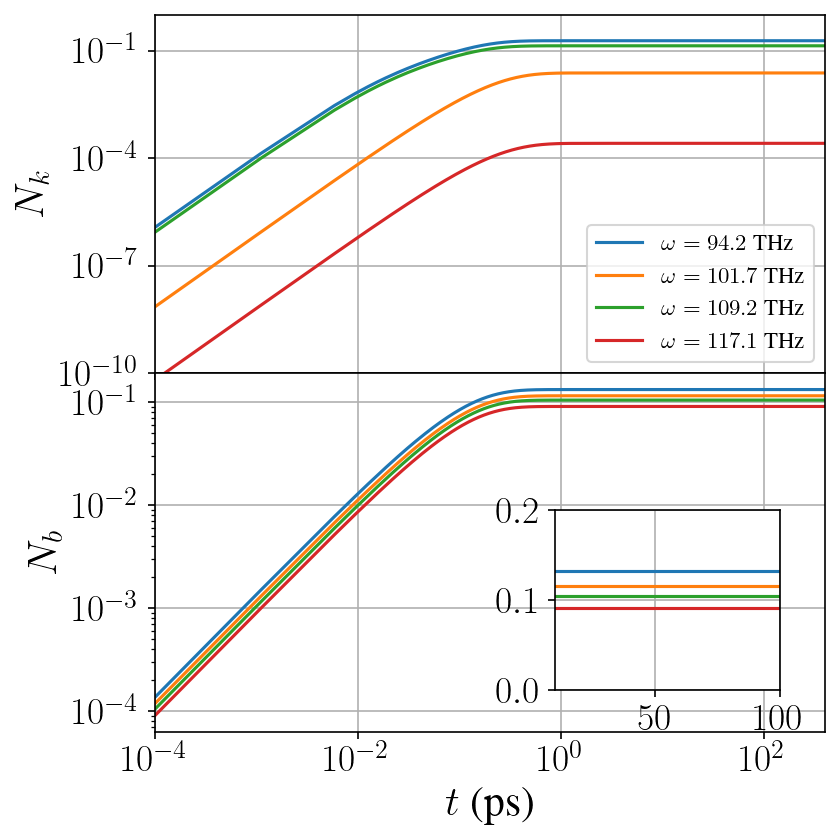

In [29]:
fig, axs = plt.subplots(2, 1, sharex=True,figsize=(6,6))
plt.subplot(211)
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e-4,400)
plt.ylim(1e-10,1)
plt.ylabel(r"$N_k$")
plt.xlabel(r"$t$ (ps)") 
#plt.title(r"$T_{pc}=0.01\,, \gamma_r=10^{13}$ s$^{-1}$")
plt.plot(tl4, Nkt4[:,1200],label=r'$\omega=94.2$ THz')
plt.plot(tl4, Nkt4[:,1300],label=r'$\omega=101.7$ THz')
plt.plot(tl4, Nkt4[:,1400],label=r'$\omega=109.2$ THz')
plt.plot(tl4, Nkt4[:,1500],label=r'$\omega=117.1$ THz')
plt.legend(loc=4,prop={'size': 11})
plt.tight_layout()
plt.grid()

plt.subplot(212)
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e-4,400)
#plt.ylim(0,0.2)
plt.ylabel(r"$N_b$")
plt.xlabel(r"$t$ (ps)") 
#plt.title(r"$T_{pc}=0.01\,, \gamma_r=10^{13}$ s$^{-1}$")
Nt = 100
plt.plot(tl4, Nbt4[:,94]/Nt,label=r'$\omega=94.2$ THz')
plt.plot(tl4, Nbt4[:,102]/Nt,label=r'$\omega=101.7$ THz')
plt.plot(tl4, Nbt4[:,109]/Nt,label=r'$\omega=109.2$ THz')
plt.plot(tl4, Nbt4[:,117]/Nt,label=r'$\omega=117.1$ THz')
plt.tight_layout()
plt.grid()
plt.subplots_adjust(hspace=0)  # Zero vertical spacing between subplots

# Inset axis: position can be fine-tuned (x0, y0, width, height in relative units)
inset_ax = fig.add_axes([0.65, 0.2, 0.25, 0.2])
#inset_ax = inset_axes(ax, width="30%", height="30%", loc='upper left')
inset_ax.plot(tl4, Nbt4[:,94]/Nt,label=r'$\omega=94.2$ THz')
inset_ax.plot(tl4, Nbt4[:,102]/Nt,label=r'$\omega=101.7$ THz')
inset_ax.plot(tl4, Nbt4[:,109]/Nt,label=r'$\omega=109.2$ THz')
inset_ax.plot(tl4, Nbt4[:,117]/Nt,label=r'$\omega=117.1$ THz')
inset_ax.set_xlim([10,100])
inset_ax.set_ylim([0,0.2])
inset_ax.grid()

plt.show()

In [3]:
Ndata_files = "./Data/rk45/passive/Photon_n_Tp0.01_n500_gr1.0e+13_gc5.0e+12_t00.0_tb400.0_A1e-16_N601.npz"
Ndata = np.load(Ndata_files, allow_pickle=True)
p_np = Ndata['parameters']
tl4 = Ndata['t']
Nkt4 = Ndata['Nkt']
Nbt4 = Ndata['Nbt']
Nat4 = Ndata['Nat']
print(Nat4 + Nbt4)
print(tl4[-1])

[[601. 601. 601. ... 601. 601. 601.]
 [601. 601. 601. ... 601. 601. 601.]
 [601. 601. 601. ... 601. 601. 601.]
 ...
 [601. 601. 601. ... 601. 601. 601.]
 [601. 601. 601. ... 601. 601. 601.]
 [601. 601. 601. ... 601. 601. 601.]]
400.0


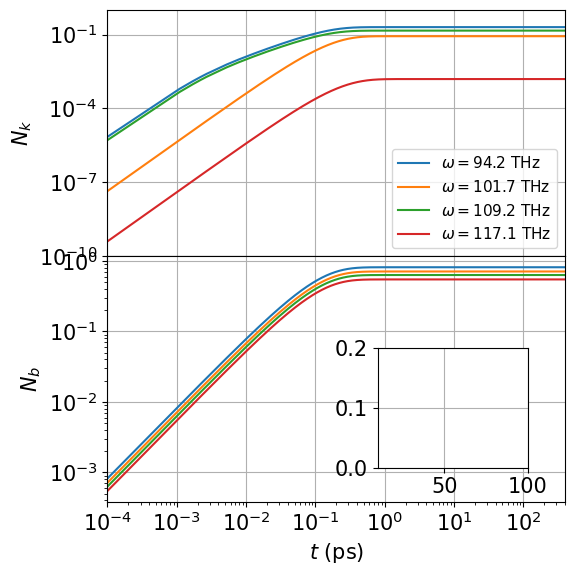

In [4]:
fig, axs = plt.subplots(2, 1, sharex=True,figsize=(6,6))
plt.subplot(211)
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e-4,400)
plt.ylim(1e-10,1)
plt.ylabel(r"$N_k$")
plt.xlabel(r"$t$ (ps)") 
#plt.title(r"$T_{pc}=0.01\,, \gamma_r=10^{13}$ s$^{-1}$")
plt.plot(tl4, Nkt4[:,1200],label=r'$\omega=94.2$ THz')
plt.plot(tl4, Nkt4[:,1300],label=r'$\omega=101.7$ THz')
plt.plot(tl4, Nkt4[:,1400],label=r'$\omega=109.2$ THz')
plt.plot(tl4, Nkt4[:,1500],label=r'$\omega=117.1$ THz')
plt.legend(loc=4,prop={'size': 11})
plt.tight_layout()
plt.grid()

plt.subplot(212)
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e-4,400)
#plt.ylim(0,0.2)
plt.ylabel(r"$N_b$")
plt.xlabel(r"$t$ (ps)") 
#plt.title(r"$T_{pc}=0.01\,, \gamma_r=10^{13}$ s$^{-1}$")
Nt = 100
plt.plot(tl4, Nbt4[:,94]/Nt,label=r'$\omega=94.2$ THz')
plt.plot(tl4, Nbt4[:,102]/Nt,label=r'$\omega=101.7$ THz')
plt.plot(tl4, Nbt4[:,109]/Nt,label=r'$\omega=109.2$ THz')
plt.plot(tl4, Nbt4[:,117]/Nt,label=r'$\omega=117.1$ THz')
plt.tight_layout()
plt.grid()
plt.subplots_adjust(hspace=0)  # Zero vertical spacing between subplots

# Inset axis: position can be fine-tuned (x0, y0, width, height in relative units)
inset_ax = fig.add_axes([0.65, 0.2, 0.25, 0.2])
#inset_ax = inset_axes(ax, width="30%", height="30%", loc='upper left')
inset_ax.plot(tl4, Nbt4[:,94]/Nt,label=r'$\omega=94.2$ THz')
inset_ax.plot(tl4, Nbt4[:,102]/Nt,label=r'$\omega=101.7$ THz')
inset_ax.plot(tl4, Nbt4[:,109]/Nt,label=r'$\omega=109.2$ THz')
inset_ax.plot(tl4, Nbt4[:,117]/Nt,label=r'$\omega=117.1$ THz')
inset_ax.set_xlim([10,100])
inset_ax.set_ylim([0,0.2])
inset_ax.grid()

plt.show()

Combined Figure 

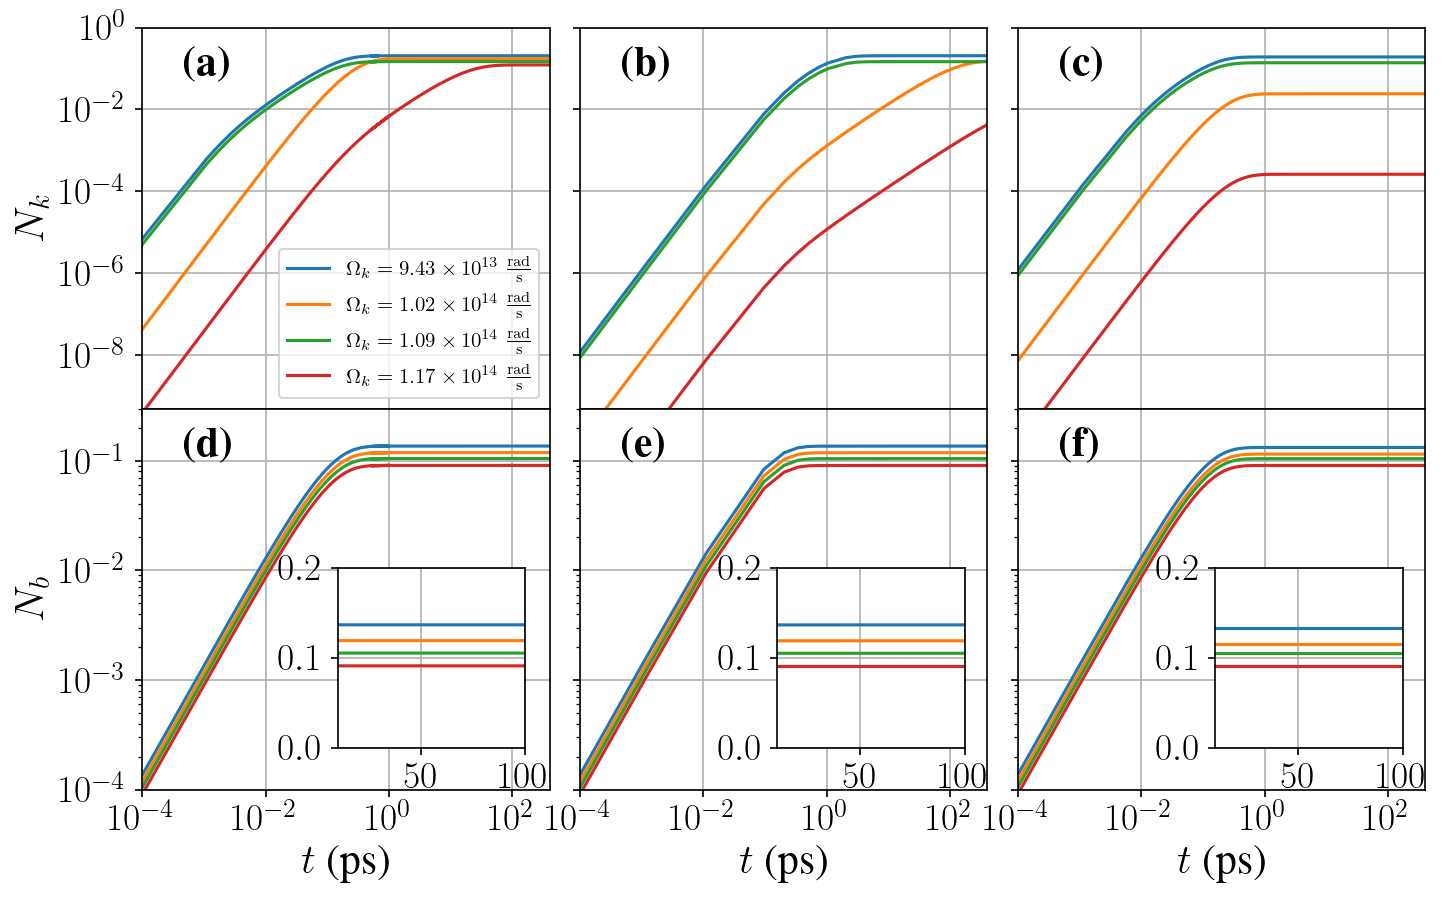

In [118]:
fig, axs = plt.subplots(2, 3, sharex=True,sharey='row',figsize=(10,6))
############## plot1

ax=plt.subplot(231)
ax.text(0.1, 0.95, r'\textbf{(a)}', transform=ax.transAxes, fontsize=20, va='top')
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e-4,400)
plt.ylim(5e-10,1)
plt.ylabel(r"$N_k$")
#plt.xlabel(r"$t$ (ps)") 
#plt.title(r"$T_{pc}=0.01\,, \gamma_r=10^{13}$ s$^{-1}$")
plt.plot(tl1, Nkt1[:,1200],label=r'$\Omega_k=9.43\times 10^{13}~\frac{\mathrm{rad}}{\mathrm{s}}$')
plt.plot(tl1, Nkt1[:,1300],label=r'$\Omega_k=1.02\times 10^{14}~\frac{\mathrm{rad}}{\mathrm{s}}$')
plt.plot(tl1, Nkt1[:,1400],label=r'$\Omega_k=1.09\times 10^{14}~\frac{\mathrm{rad}}{\mathrm{s}}$')
plt.plot(tl1, Nkt1[:,1500],label=r'$\Omega_k=1.17\times 10^{14}~\frac{\mathrm{rad}}{\mathrm{s}}$')
plt.legend(loc=4,prop={'size': 10})
plt.tight_layout()
plt.grid()

ax=plt.subplot(234)
ax.text(0.1, 0.95, r'\textbf{(d)}', transform=ax.transAxes, fontsize=20, va='top')

plt.xscale('log')
plt.yscale('log')
plt.xlim(1e-4,400)
plt.ylabel(r"$N_b$")
plt.xlabel(r"$t$ (ps)") 
#plt.title(r"$T_{pc}=0.01\,, \gamma_r=10^{13}$ s$^{-1}$")
Nt = 601
plt.plot(tl1, Nbt1[:,94]/Nt,label=r'$\Omega=9.43\times 10^{13}~\frac{\mathrm{rad}}{\mathrm{s}}$ ')
plt.plot(tl1, Nbt1[:,102]/Nt,label=r'$\Omega=101.7$ THz')
plt.plot(tl1, Nbt1[:,109]/Nt,label=r'$\Omega=109.2$ THz')
plt.plot(tl1, Nbt1[:,117]/Nt,label=r'$\Omega=117.1$ THz')
#plt.legend(loc=4,prop={'size': 12})
#plt.tight_layout()
plt.grid()

plt.subplots_adjust(hspace=0)  # Zero vertical spacing between subplots

# Inset axis: position can be fine-tuned (x0, y0, width, height in relative units)
inset_ax = fig.add_axes([0.245, 0.15, 0.125, 0.2])
#inset_ax = inset_axes(ax, width="30%", height="30%", loc='upper left')
inset_ax.plot(tl1, Nbt1[:,94]/Nt,label=r'$\omega=94.2$ THz')
inset_ax.plot(tl1, Nbt1[:,102]/Nt,label=r'$\omega=101.7$ THz')
inset_ax.plot(tl1, Nbt1[:,109]/Nt,label=r'$\omega=109.2$ THz')
inset_ax.plot(tl1, Nbt1[:,117]/Nt,label=r'$\omega=117.1$ THz')
inset_ax.set_xlim([10,100])
inset_ax.set_ylim([0,0.2])
inset_ax.grid()

############## plot2


ax=plt.subplot(232)
ax.text(0.1, 0.95, r'\textbf{(b)}', transform=ax.transAxes, fontsize=20, va='top')
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e-4,400)
plt.ylim(5e-10,1)
#plt.ylabel(r"$N_k$")
#plt.xlabel(r"$t$ (ps)") 
#plt.title(r"$T_{pc}=0.01\,, \gamma_r=10^{13}$ s$^{-1}$")
plt.plot(tl2, Nkt2[:,1200],label=r'$\omega=94.2$ THz')
plt.plot(tl2, Nkt2[:,1300],label=r'$\omega=101.7$ THz')
plt.plot(tl2, Nkt2[:,1400],label=r'$\omega=109.2$ THz')
plt.plot(tl2, Nkt2[:,1500],label=r'$\omega=117.1$ THz')
#plt.legend(loc=4,prop={'size': 11})
#plt.tight_layout()
plt.grid()

ax=plt.subplot(235)
ax.text(0.1, 0.95, r'\textbf{(e)}', transform=ax.transAxes, fontsize=20, va='top')

plt.xscale('log')
plt.yscale('log')
plt.xlim(1e-4,400)
#plt.ylabel(r"$N_b$")
plt.xlabel(r"$t$ (ps)") 
#plt.title(r"$T_{pc}=0.01\,, \gamma_r=10^{13}$ s$^{-1}$")
Nt = 100
plt.plot(tl2, Nbt2[:,94]/Nt,label=r'$\omega=94.2$ THz')
plt.plot(tl2, Nbt2[:,102]/Nt,label=r'$\omega=101.7$ THz')
plt.plot(tl2, Nbt2[:,109]/Nt,label=r'$\omega=109.2$ THz')
plt.plot(tl2, Nbt2[:,117]/Nt,label=r'$\omega=117.1$ THz')
#plt.legend(loc=4,prop={'size': 12})
#plt.tight_layout()
plt.grid()

plt.subplots_adjust(hspace=0,wspace=0.075)  # Zero vertical spacing between subplots

# Inset axis: position can be fine-tuned (x0, y0, width, height in relative units)
inset_ax = fig.add_axes([0.538, 0.15, 0.125, 0.2])
#inset_ax = inset_axes(ax, width="30%", height="30%", loc='upper left')
inset_ax.plot(tl2, Nbt2[:,94]/Nt,label=r'$\omega=94.2$ THz')
inset_ax.plot(tl2, Nbt2[:,102]/Nt,label=r'$\omega=101.7$ THz')
inset_ax.plot(tl2, Nbt2[:,109]/Nt,label=r'$\omega=109.2$ THz')
inset_ax.plot(tl2, Nbt2[:,117]/Nt,label=r'$\omega=117.1$ THz')
inset_ax.set_xlim([10,100])
inset_ax.set_ylim([0,0.2])
inset_ax.grid()


############## plot4


ax=plt.subplot(233)
ax.text(0.1, 0.95, r'\textbf{(c)}', transform=ax.transAxes, fontsize=20, va='top')

plt.xscale('log')
plt.yscale('log')
plt.xlim(1e-4,400)
plt.ylim(5e-10,1)
#plt.ylabel(r"$N_k$")
#plt.xlabel(r"$t$ (ps)") 
#plt.title(r"$T_{pc}=0.01\,, \gamma_r=10^{13}$ s$^{-1}$")
plt.plot(tl4, Nkt4[:,1200],label=r'$\omega=94.2$ THz')
plt.plot(tl4, Nkt4[:,1300],label=r'$\omega=101.7$ THz')
plt.plot(tl4, Nkt4[:,1400],label=r'$\omega=109.2$ THz')
plt.plot(tl4, Nkt4[:,1500],label=r'$\omega=117.1$ THz')
#plt.legend(loc=4,prop={'size': 11})
#plt.tight_layout()
plt.grid()

ax = plt.subplot(236)
ax.text(0.1, 0.95, r'\textbf{(f)}', transform=ax.transAxes, fontsize=20, va='top')
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e-4,400)
plt.ylim(1e-4,3e-1)
#plt.ylabel(r"$N_b$")
plt.xlabel(r"$t$ (ps)") 
#plt.title(r"$T_{pc}=0.01\,, \gamma_r=10^{13}$ s$^{-1}$")
Nt = 100
plt.plot(tl4, Nbt4[:,94]/Nt,label=r'$\omega=94.2$ THz')
plt.plot(tl4, Nbt4[:,102]/Nt,label=r'$\omega=101.7$ THz')
plt.plot(tl4, Nbt4[:,109]/Nt,label=r'$\omega=109.2$ THz')
plt.plot(tl4, Nbt4[:,117]/Nt,label=r'$\omega=117.1$ THz')
#plt.legend(loc=4,prop={'size': 12})
#plt.tight_layout()
plt.grid()


# Inset axis: position can be fine-tuned (x0, y0, width, height in relative units)
inset_ax = fig.add_axes([0.83, 0.15, 0.125, 0.2])
#inset_ax = inset_axes(ax, width="30%", height="30%", loc='upper left')
inset_ax.plot(tl4, Nbt4[:,94]/Nt,label=r'$\omega=94.2$ THz')
inset_ax.plot(tl4, Nbt4[:,102]/Nt,label=r'$\omega=101.7$ THz')
inset_ax.plot(tl4, Nbt4[:,109]/Nt,label=r'$\omega=109.2$ THz')
inset_ax.plot(tl4, Nbt4[:,117]/Nt,label=r'$\omega=117.1$ THz')
inset_ax.set_xlim([10,100])
inset_ax.set_ylim([0,0.2])
inset_ax.grid()


plt.show()

# Active Regime

In [105]:
Ndata_files = './Data/rk45/active/Photon_n_Tp0.01_n500_gr1.0e+10_gc1.0e+09_t00.0_tb2027.8_v2.npz'
Ndata = np.load(Ndata_files, allow_pickle=True)
p_np = Ndata['parameters']
tl = Ndata['t']
Nkt = Ndata['Nkt']
Nbt = Ndata['Nbt']
Nat = Ndata['Nat']
print(Nat + Nbt)

[[601. 601. 601. ... 601. 601. 601.]
 [601. 601. 601. ... 601. 601. 601.]
 [601. 601. 601. ... 601. 601. 601.]
 ...
 [601. 601. 601. ... 601. 601. 601.]
 [601. 601. 601. ... 601. 601. 601.]
 [601. 601. 601. ... 601. 601. 601.]]


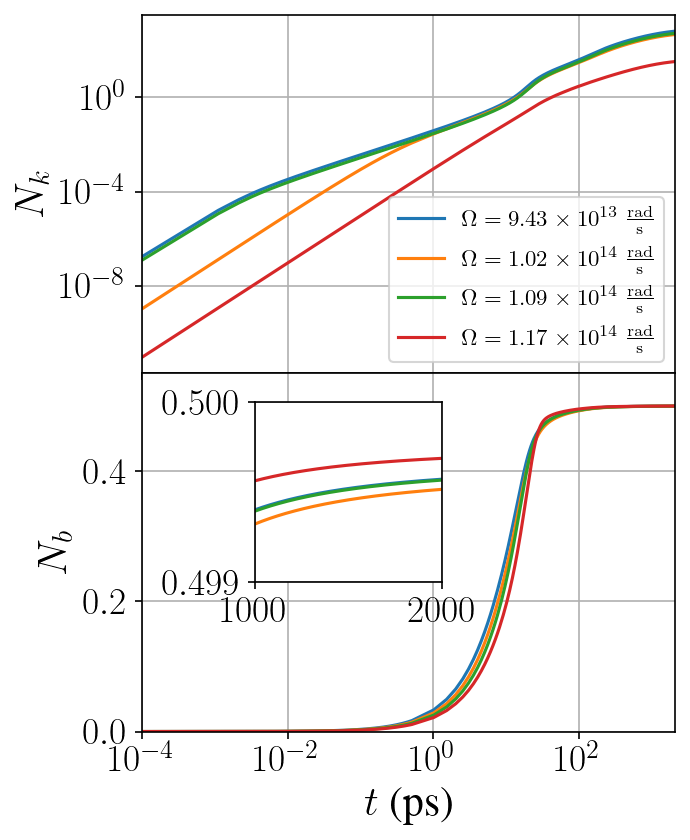

In [113]:
fig, axs = plt.subplots(2, 1, sharex=True,figsize=(5,6))
plt.subplot(211)
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e-4,2100)
#plt.ylim(1e-5,1e-1)
plt.ylabel(r"$N_k$")
plt.xlabel(r"$t$ (ps)") 
#plt.title(r"$T_{pc}=0.01\,, \gamma_r=10^{13}$ s$^{-1}$")
plt.plot(tl, Nkt[:,1200],label=r'$\Omega_k=9.43\times 10^{13}~\frac{\mathrm{rad}}{\mathrm{s}}$')
plt.plot(tl, Nkt[:,1300],label=r'$\Omega_k=1.02\times 10^{14}~\frac{\mathrm{rad}}{\mathrm{s}}$')
plt.plot(tl, Nkt[:,1400],label=r'$\Omega_k=1.09\times 10^{14}~\frac{\mathrm{rad}}{\mathrm{s}}$')
plt.plot(tl, Nkt[:,1500],label=r'$\Omega_k=1.17\times 10^{14}~\frac{\mathrm{rad}}{\mathrm{s}}$')
plt.legend(loc=4,prop={'size': 11})
plt.tight_layout()
plt.grid()

ax = plt.subplot(212)
plt.xscale('log')
#plt.yscale('log')
plt.xlim(1e-4,2100)
plt.ylim(0,0.55)
plt.ylabel(r"$N_b$")
plt.xlabel(r"$t$ (ps)") 
#plt.title(r"$T_{pc}=0.01\,, \gamma_r=10^{13}$ s$^{-1}$")
Nt = 601
plt.plot(tl, Nbt[:,94]/Nt,label=r'$\omega=94.2$ THz')
plt.plot(tl, Nbt[:,102]/Nt,label=r'$\omega=101.7$ THz')
plt.plot(tl, Nbt[:,109]/Nt,label=r'$\omega=109.2$ THz')
plt.plot(tl, Nbt[:,117]/Nt,label=r'$\omega=117.1$ THz')
#plt.legend(loc=4,prop={'size': 11})
plt.tight_layout()
plt.grid()
plt.subplots_adjust(hspace=0)  # Zero vertical spacing between subplots

# Inset axis: position can be fine-tuned (x0, y0, width, height in relative units)
inset_ax = fig.add_axes([0.38, 0.32, 0.25, 0.2])
#inset_ax = inset_axes(ax, width="30%", height="30%", loc='upper left')
inset_ax.plot(tl, Nbt[:,94]/Nt,label=r'$\omega=94.2$ THz')
inset_ax.plot(tl, Nbt[:,102]/Nt,label=r'$\omega=101.7$ THz')
inset_ax.plot(tl, Nbt[:,109]/Nt,label=r'$\omega=109.2$ THz')
inset_ax.plot(tl, Nbt[:,117]/Nt,label=r'$\omega=117.1$ THz')
inset_ax.set_xlim([1000,2000])
inset_ax.set_ylim([0.4990,0.50])
inset_ax.grid()

plt.show()

In [114]:
Ndata_files = './Data/rk45/active/Photon_n_Tp0.01_n500_gr1.0e+10_gc2.5e+10_t00.0_tb2500.0.npz'
Ndata = np.load(Ndata_files, allow_pickle=True)
p_np = Ndata['parameters']
tl = Ndata['t']
Nkt = Ndata['Nkt']
Nbt = Ndata['Nbt']
p_np

array({'gamma': 1000000000000.0, 'gamma_normal': 1, 'gamma_c': 0.025, 'gamma_r': 0.01, 'Lambda_0': 0.01, 'omega_0': 160.0, 'N': 601, 'Np': 12, 'Temp_p': 400, 'Temp': 400, 'A': 1e-16, 'D': 0.00774339381694},
      dtype=object)

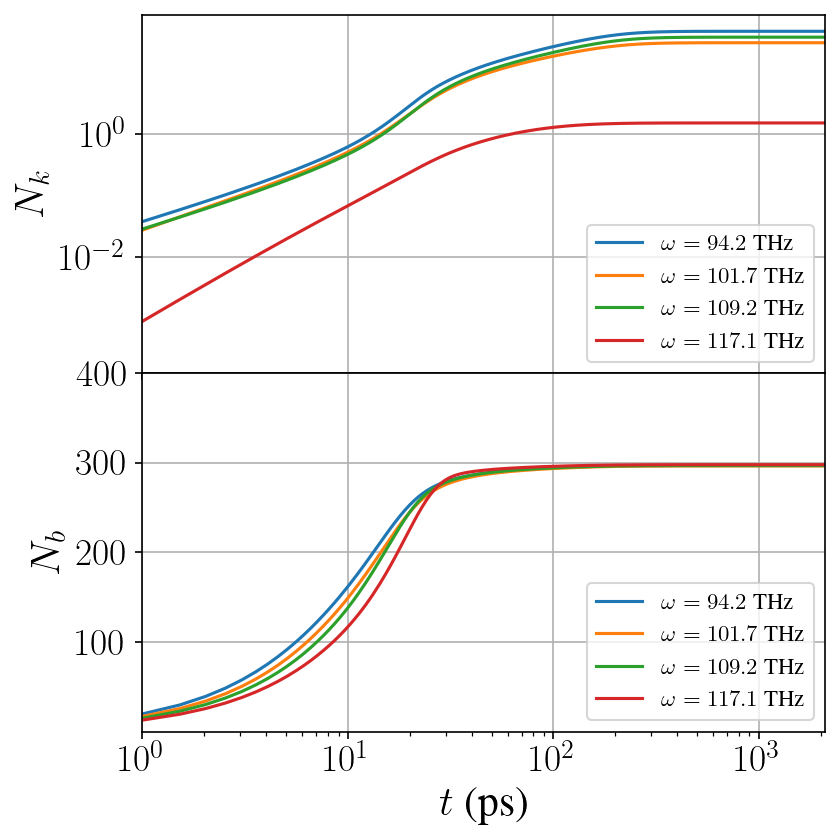

In [117]:
fig, axs = plt.subplots(2, 1, sharex=True,figsize=(6,6))
plt.subplot(211)
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e0,2100)
#plt.ylim(1e-5,1e-1)
plt.ylabel(r"$N_k$")
plt.xlabel(r"$t$ (ps)") 
#plt.title(r"$T_{pc}=0.01\,, \gamma_r=10^{13}$ s$^{-1}$")
plt.plot(tl, Nkt[:,1200],label=r'$\omega=94.2$ THz')
plt.plot(tl, Nkt[:,1300],label=r'$\omega=101.7$ THz')
plt.plot(tl, Nkt[:,1400],label=r'$\omega=109.2$ THz')
plt.plot(tl, Nkt[:,1500],label=r'$\omega=117.1$ THz')
plt.legend(loc=4,prop={'size': 11})
plt.tight_layout()
plt.grid()

plt.subplot(212)
plt.xscale('log')
#plt.yscale('log')
plt.xlim(1e-0,2100)
plt.ylim(2e-3,400)
plt.ylabel(r"$N_b$")
plt.xlabel(r"$t$ (ps)") 
#plt.title(r"$T_{pc}=0.01\,, \gamma_r=10^{13}$ s$^{-1}$")
plt.plot(tl, Nbt[:,94],label=r'$\omega=94.2$ THz')
plt.plot(tl, Nbt[:,102],label=r'$\omega=101.7$ THz')
plt.plot(tl, Nbt[:,109],label=r'$\omega=109.2$ THz')
plt.plot(tl, Nbt[:,117],label=r'$\omega=117.1$ THz')
plt.legend(loc=4,prop={'size': 11})
plt.tight_layout()
plt.grid()
plt.subplots_adjust(hspace=0)  # Zero vertical spacing between subplots
plt.show()

In [32]:
len(Nbt[:,94])

1493